# Bike Sharing Usage Analysis

---

# Table of Contents <a id="top"></a>

#### 1. [Project Objectives](#part1)
- [1.1 Background](#part1.1)
- [1.2 Business/Research Questions](#part1.2)

#### 2. [Data Preparation](#part2)

#### 3. [Visualisations](#part3)
- [3.1 Distribution of Total Daily Bike Rentals](#part3.1)
- [3.2 Bike Rentals by Day of the Week](#part3.2)
- [3.3 Average Bike Rentals by Day Type](#part3.3)
- [3.4 Bike Rentals over Time](#part3.4)
- [3.5 Distribution of Bike Rentals across Seasons](#part3.5)
- [3.6 Bike Rentals by Weather Type](#part3.6)
- [3.7 Temperature vs Bike Rentals](#part3.7)
- [3.8 Humidity vs Bike Rentals](#part3.8)
- [3.9 Wind Speed vs Bike Rentals](#part3.9)
- [3.10 Correlation Heatmap of Weather Variables and Bike Rentals](#part3.10)
- [3.11 Bike Rentals by Temperature Range](#part3.11)
- [3.12 Proportion of Bike Rentals by User Type](#part3.12)
- [3.13 Bike Rentals by Day of the Week and User Type](#part3.13)
- [3.14 Distribution of Bike Rentals across Weather Conditions by User Type](#part3.14)
- [3.15 Bike Rentals over Time by User Type](#part3.15)

#### 4. [Dashboard](#part4)
- [4.1 Time Series Dashboard](#part4.1)
- [4.2 Weather Impact Dashboard](#part4.2)
- [4.3 Customer Behaviour Dashboard](#part4.3)

---

# 1. Project Objectives <a id="part1"></a>

[Back to top](#top)

### 1.1 Background <a id="part1.1"></a>

Imagine that you are part of the market research team for Leo Bike Share Co, a bike sharing business who is based in Washington DC, USA. The team has collected data from bike sharing rentals for the past 2 years. The data is stored in the Bike Sharing Dataset.csv file. Through data preparation, exploration and visualisation, the market research team decides to see if the information provided which included weather conditions impacts the bike rentals. Using this, the team will seek to provide meaningful recommendations to management for future business improvements.

[Back to top](#top)

### 1.2 Business/Research Questions <a id="part1.2"></a>

#### Time Series
1. Are there many days with very high or very low rentals?
2. What is the most popular day for bike rentals?
3. How do bike rentals vary across different types of day?
4. Are there noticeable trends in bike rentals over time?

#### Weather Conditions
1. How do bike rental patterns vary across different seasons?
2. Do people rent more bikes on clear weather days than rainy days?
3. What is the relationship between temperature and bike rentals?
4. What is the relationship between humidity and bike rentals?
5. What is the relationship between wind speed and bike rentals?
6. Which weather variable has the strongest correlation with bike rentals?
7. Which temperature range do riders prefer for biking?

#### Customer Behaviour
1. Are there more casual or registered customers?
2. What are the usage patterns? Which day of the week do they prefer?
3. Are casual users more affected by weather type?
4. Are there noticeable trends in bike rentals over time by the different users?

[Back to top](#top)

# 2. Data Preparation <a id="part2"></a>
- The dataset has been reviewed for missing values, and no NA records were found.
- Columns expected to contain unique values have been checked, with no duplicates detected.
- Unique values in categorical columns have been verified to ensure data consistency.
- Measurable columns were examined to identify any illogical values. For instance, a minimum humidity value of 0.0% was found, which is likely an error. Therefore, this value will not be included in the analysis.
- A logical consistency check was performed to confirm that the sum of casual and registered riders equals the total count for each record.
- Data types were reviewed and corrected as needed, including converting date columns to the appropriate date format.

[Back to top](#top)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("BikeSharing Dataset.csv")

# Create a copy of the original datatset
df_bckup = df.copy()

In [3]:
# Check how many rows and columns in the datsaset
df.shape

(731, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check for any NA values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [7]:
# Check if there are any measurable values that do not make sense
cols_min_max = ["temp", "atemp", "hum", "windspeed"]

for col in cols_min_max:
    print(f"\n{col}")
    print(f"The max value is {df[col].max()}. The min value is {df[col].min()}.")


temp
The max value is 35.33. The min value is 2.42.

atemp
The max value is 42.04. The min value is 3.95.

hum
The max value is 97.25. The min value is 0.0.

windspeed
The max value is 34.0. The min value is 1.5.


In [8]:
# Find the index of the row where humidity is 0.0
index_to_drop = df[df['hum']==0].index
# Drop the row
df = df.drop(index_to_drop)

Note: The column 'hum' has a minimum value of 0%. Realistically, a humidity value of 0.0% is very rare in real-world scenarios and since there is a maximum value of 97.25%, the values in this column were not rounded to whole numbers. This means that 0.0% was likely not the result of rounding down and it is considered to be invalid. Therefore, this value will not be included in the analysis.

In [9]:
# Ensure these columns have the right unique values
cols_check = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for col in cols_check:
    print(f"\n{col}")
    unique_values = df[col].unique()
    print(",".join(str(x) for x in unique_values))


season
1,2,3,4

yr
0,1

mnth
1,2,3,4,5,6,7,8,9,10,11,12

holiday
0,1

weekday
6,0,1,2,3,4,5

workingday
0,1

weathersit
2,1,3


In [10]:
# Check if df['casual'] + df['registered'] is not equal to df['count'] (It must tally to count)
len(df[df['casual'] + df['registered'] != df['cnt']])

0

In [11]:
# Change the string date to a proper date type
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

In [12]:
# Check if the date conversion failed (NaT exists)
df['dteday'].isnull().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4

In [14]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,20.317041,23.723959,62.876096,12.756096,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,18.790000,1.500000,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.810000,16.892500,52.052500,9.040000,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465000,24.370000,62.710000,12.125000,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.882500,30.445000,73.030000,15.620000,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,7.508551,8.151926,14.061490,5.192687,686.449738,1557.149836,1933.194931


In [15]:
len(df[df['weekday']==0])

105

---

# 3. Visualisations <a id="part3"></a>

[Back to top](#top)

### 3.1 Distribution of Total Daily Bike Rentals <a id="part3.1"></a>

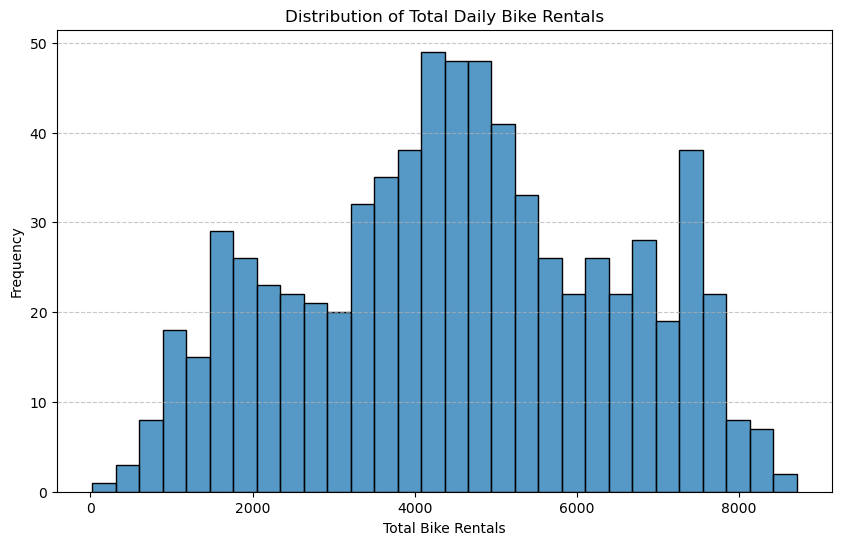

In [16]:
# Set the figure size for the plo
plt.figure(figsize=(10, 6))

# Create a histogram of the 'cnt' column (total daily bike rentals) with 30 bins
sns.histplot(df['cnt'], bins=30, kde=False)

# Set title and label names of the plot
plt.title('Distribution of Total Daily Bike Rentals')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')

# Display grid in the background for better readability
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**Question: Are there many days with very high or very low rentals?**

The choice of histogram shows how often certain ranges of rentals occur as well as the common rental volumes. It can also detect unusual patterns such as outliers (very low or high rental days) or even gaps for rentals levels that rarely occur. The title and axis labels are defined to convey the subject of the graph. 

The tallest bars are centered around 4000 to 5000 rentals. This means that most days had around 4000 to 5000 rentals. The management should know that most days have a typical demand of 4000-5000 rentals and they should keep enough bikes to handle the common range. In addition, prepare for occasional spikes (up to 9000 rentals) by addding reserve bikes and using temporary pop-up stations in busy areas. The far left bins (rentals below 1000) would likely represent bad weather, holiday or system outages. The far right bins (8000+) could represent peak season or special events. Understanding these anomalies allows for more accurate forecasting, improved service planning, and targeted marketing initiatives, particularly around high-demand events or underperforming time periods.

[Back to top](#top)

### 3.2 Bike Rentals by Day of the Week <a id="part3.2"></a>

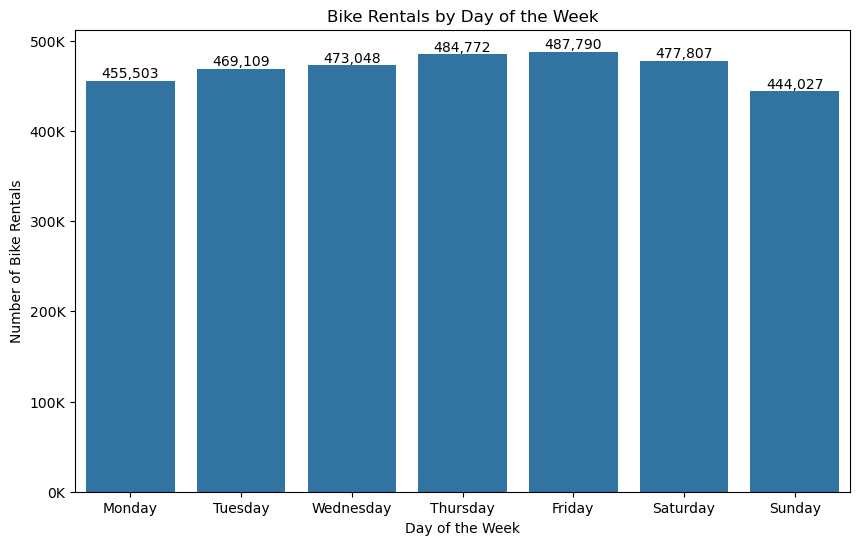

In [17]:
# Group the dataset by 'weekday' and sum the 'cnt' values for each day
top_days = df.groupby('weekday')['cnt'].sum().reset_index()

# Add a new column 'day' with the corresponding day names
top_days['day'] = top_days['weekday'].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    
})

# Sort the days in this order for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot of 'cnt' by 'day'
barplot = sns.barplot(data=top_days, x='day', y='cnt', order=day_order)

# Format y-axis in K
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Set title and label names for the plot
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Rentals')

# Annotation of values on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )
        
# Display the plot 
plt.show()

**Question: What is the most popular day for bike rentals?**

The bar chart above illustrates the number of bike rentals across different days of the week. The numerical representation of the days has been mapped to their corresponding day names, arranged in order from Monday to Sunday for improved readability. The y-axis labels were formatted using shorter numerical representations. The title and axis labels are defined to convey the subject of the graph. Each bar is annotated with values to clearly indicate the number of bike rentals. This makes it easier for the management to interpret and identify trends in bike rentals across specific days. 

The data shows that Friday records the highest number of bike rentals (487,790), while Sunday has the lowest (444,027). There is a clear upward trend in rentals from Monday to Friday, peaking on Friday, followed by a slight decrease on Saturday and a more significant drop on Sunday. This pattern suggests that most rentals are likely for weekday commuting purposes, such as traveling to work or school. To improve weekend usage, the management may consider promoting leisure-oriented bike rentals on Saturdays and Sundays, through tailored marketing campaigns and special offers.

[Back to top](#top)

### 3.3 Average Bike Rentals by Day Type <a id="part3.3"></a>

In [18]:
# Create a new column 'day_type' in the DataFrame 'df' by applying a function to each row
# The function classifies each day into one of four categories based on 'workingday' and 'holiday' flags.
# The four categories in the column 'day_type' will be 'Weekday', 'Holiday on a Weekday', 'Weekend', 'Holiday on a Weekend'. 
df['day_type'] = df.apply(
    lambda row: (
        'Weekday (Holiday)' if row['holiday'] == 1 and row['weekday'] not in [0, 6] else
        'Weekend (Holiday)' if row['holiday'] == 1 and row['weekday'] in [0, 6] else
        'Weekday' if row['weekday'] not in [0, 6] else
        'Weekend'
    ),
    axis=1
)

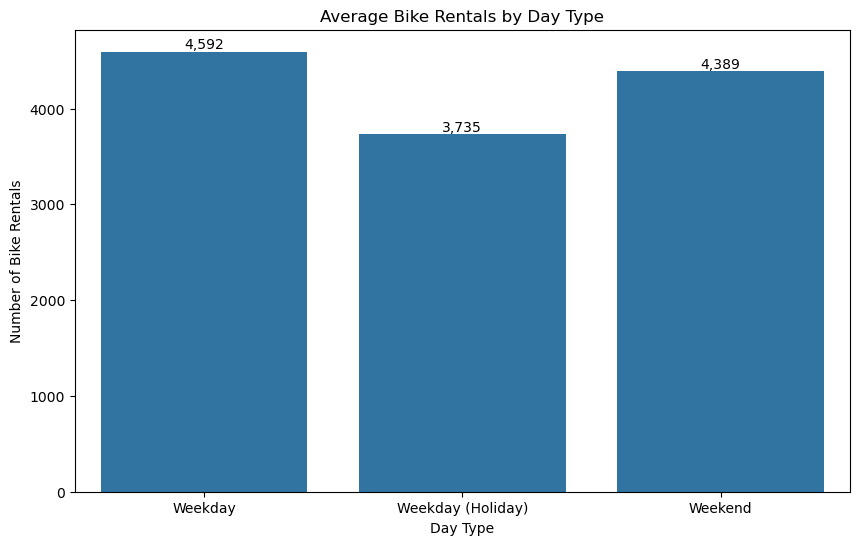

In [19]:
# Calculate the average 'cnt' (count) for each category in 'day_type' by grouping the DataFrame
avg_daytype = df.groupby('day_type')['cnt'].mean().reset_index()

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot of 'cnt' by 'day_type'
barplot = sns.barplot(data=avg_daytype, x='day_type', y='cnt', errorbar=None)

# Set title and label names for the plot
plt.title('Average Bike Rentals by Day Type')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Day Type')

# Annotation of values on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )

# Display the plot
plt.show()

**Question: How do bike rentals vary across different types of day?**

The bar chart above illustrates the average bike rentals across the different day type. A new feature 'day_type' was created by combining 'weekday' and 'holiday' columns to categorize the type of day for each record. There are only 3 categories on this x-axis because there are no record for holidays that fall on a weekend. Instead of showing full numbers on the y-axis, a shorter format was used for better readability. The title and axis labels are defined to convey the subject of the graph. Each bar is annotated with values to clearly indicate the number of bike rentals. 

On average, Weekdays have the highest bike usage, likely driven by commuting and routine activities. Weekends see slightly lower usage, which may reflect reduced commuting. Interestingly, holidays that fall on weekends exhibit the lowest rental numbers, suggesting that holidays do not actually boost bike rentals. This could be because people prefer staying home or engaging in other recreational activities. This pattern suggests that weekdays are the strongest days for bike usage. To boost ridership on underutilized days, targeted campaigns for weekends and holidays could be effective. Alternatively, introducing different offerings, such as family bikes or group packages, might better suit weekend demand.

[Back to top](#top)

### 3.4 Bike Rentals over Time <a id="part3.4"></a>

In [20]:
# Extract the year from 'dteday' column into a new 'year column'
df['year'] = df['dteday'].dt.year
# Extract the month from 'dteday' column into a new 'year column'
df['month'] = df['dteday'].dt.month
# Combine year and month into a single datetime object and set day to the first day of the month
df['month_year'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

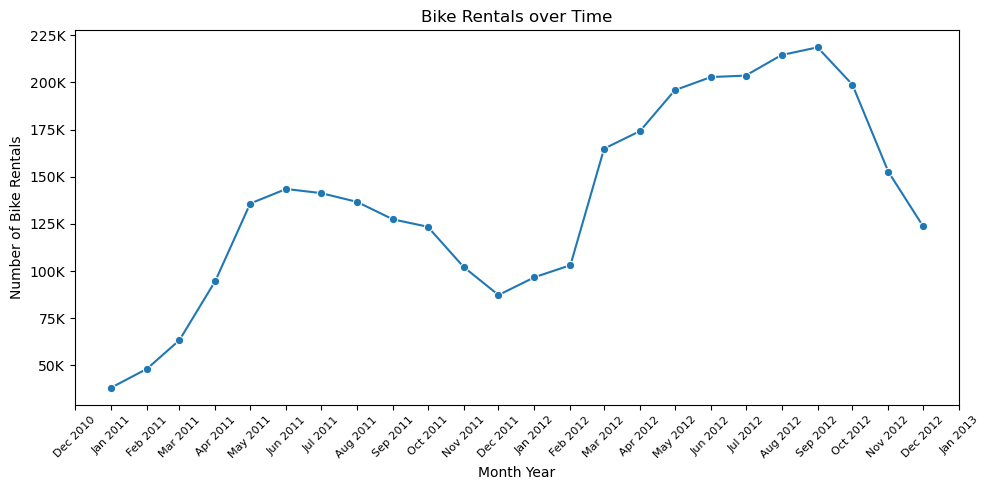

In [21]:
# Set figure size for the plot
plt.figure(figsize=(10,5))

# Group the data by 'month_year' and calculate total 'cnt' for each month
monthly_df = df.groupby('month_year')['cnt'].sum().reset_index()

# Create a line plot of 'cnt' over 'month_year'
sns.lineplot(data=monthly_df, x='month_year', y='cnt', marker="o", errorbar=None)

# Format the x-axis dates to month and full year (e.g.,'Jan 2011')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Set x-axis ticks to be monthly intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

# Format y-axis in K
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Set the x-axis limit range, rotate the labels and set font size for better readability
plt.xlim(pd.to_datetime('2010-12-01'), pd.to_datetime('2013-01-01'))
plt.xticks(rotation=45, fontsize=8) 

# Set title and label names for the plot
plt.title('Bike Rentals over Time')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Month Year')

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Are there noticeable trends in bike rentals over time?**

The line chart above illustrates the number of bike rentals over time. It helps to identify growth patterns, seasonal trends or period of low/high demand. Monthly bike rentals was used instead of daily figures to reduce variability and highlight broader usage trends, enabling clearer insights into seasonal p[atterns and long-term changes in bike rental behaviours. Month-year labels such as 'Jan 2011' were used on the time axis to improve readibility. The use of markers clearly indicate which each data value lies along the line. To enhance readability, the y-axis labels were formatted using shorter numerical representations. The title and axis labels are defined to convey the subject of the graph.

THis line chart suggests that bike rentals are highly seasonal, with usage peaking in warmer months. There is a strong growth in 2012, especially during summer, could indicate increased demand, possibly influenced by marketing efforts, improved infrastructure, or favorable weather conditions. 
The sharp declines in winter reflect lower usage during the colder months. The management can take advantage of this insight to plan events or promotions during the low season to boost rentals. Additionally, the data enables more accurate forecasting of revenue and budgeting throughout the year.

[Back to top](#top)

---

## Weather Conditions

### 3.5 Distribution of Bike Rentals across Seasons <a id="part3.5"></a>

The number of bike rentals tend to be the lowest in Spring with wider distribution at the lower rental counts, indicating many days with fewer rentals. Summer and Fall are the most popular seasons for bike rentals, with Fall having a slightly higher median. Winter has moderate median rentals but also days with very few or no rentals. The warm weather in Summer and Fall encourages biking, while cold and unpredicatable winter weather reduces rentals. The presence of outliers suggests occasional unusual days in spring (high rentals) and winter (very low rentals). During off-peak seasons, the management can perform major maintenance in Winter and Spring to ensure bikes are ready for peak seasons. 

[Back to top](#top)

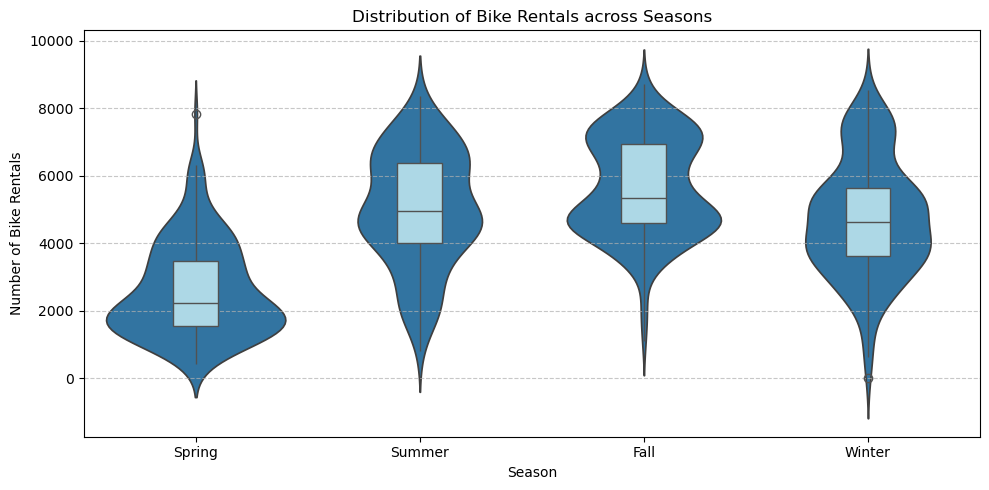

In [28]:
# Set figure size for the plot
plt.figure(figsize=(10,5))

# Create a violin plot to show distribution of 'cnt' for each 'season'
sns.violinplot(data=df, x='season', y='cnt', inner=None)
# Overlay a boxplot on top of the violin plot to show median, IQR and outliers
sns.boxplot(data=df, x='season', y='cnt', whis=1.5, width=0.2, showcaps=False, boxprops={'facecolor':'lightblue'}, showfliers=True)

# Define readable labels for the four seasons
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
# Replace the x-axis tick labels with the season names
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)

# Set title and label names for the plot
plt.title('Distribution of Bike Rentals across Seasons')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Season')

# Set grid
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: How do bike rental patterns vary across different seasons?**

This violin plot with a box plot inside illustrates the distribution of rentals across the different seasons with a clear summary statistics of a box plot. The combination of violin plot and box plot gives a detailed look on the data distribution with clear standard summary statistics. The thicker parts of the violin represent the range where the majority of data points lie. The lines inside each violin shape represent the median, interquartile range, providing insight into the central tendency and the spread of the data.  The "whiskers" extending show the range of data poitns, while any dots outside the whiskers are potential outliers. 

From the plot, we can observe: 
- Spring: The distribution is skewed toward the lower number of rentals, with most rentals between 1000 and 4000. There is one noticeable outlier close to 8000, could be due to promotional campaign, special event or holiday. There might also be an exceptionally nice day like a warm, sunday day after a cold spell that caused the spike in bike rentals.
- Summer: The number of bike rentals is generally higher compared to Spring, with a median around 5000. The distribution is wider, ranging from about 1000 to 8000 rentals. Summer generally has more bike rentals than Spring, but the actual number can fluctuate quite a bit day-to-day. This means sometimes rentals are moderate, and other times they are very high.
- Fall: The distribution is similar to Summer but appears slightly more concentrated around the median (around 5000 to 6000). There is a wider spread towards the higher rental values. In Fall, bike rentals tend to be more stable and usually hover around 5000-6000, but occasionally, rentals jump much higher.
- Winter: The distribution is somewhat similar to Summer and Fall but seems to have more rentals on the lower side and fewer very high values. Basically, Winter is the slow season for bike rentals, with generally lower and less variable demand. An outlier at 0 rentals in Winter means there was at least one day where no bikes were rented at all during the Winter season.

The management can expect and prepare for high demand during Summer and Fall. Ensure enough bikes are available, and maintenance teams are ready for increased usage. Since rentals drop during Winter, they can also temporarily focus on maintenance and repairs. In spring, providing raincoats or rain ponchos can help riders ride more comfortably even if it drizzles. The management can monitor behaviour across the seasons to  anticipate demand spikes or drops, and adjust operations accordingly.

[Back to top](#top)

### 3.6 Bike Rentals by Weather Type <a id="part3.6"></a>

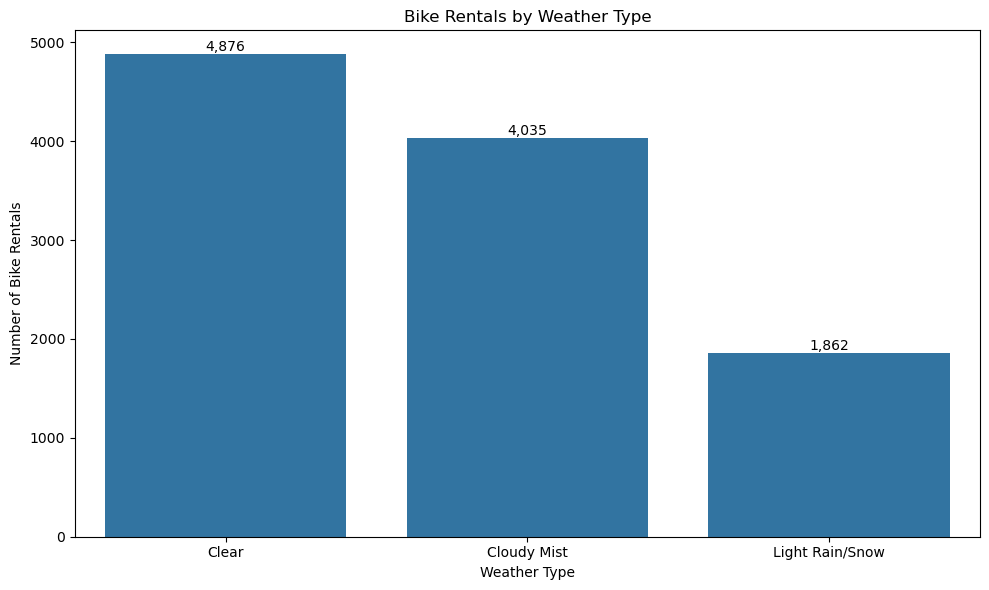

In [29]:
# Set figure size for the plot
plt.figure(figsize=(10,6))

# Create a bar plot of 'cnt' by 'weathersit'
barplot = sns.barplot(data=df, x='weathersit', y='cnt', errorbar=None)

# Define readable labels for the weather type
weathertype_labels = ['Clear', 'Cloudy Mist', 'Light Rain/Snow']
# Replace the x-axis tick labels with the weather type
plt.xticks(ticks=[0, 1, 2], labels=weathertype_labels)

# Set title and label names for the plot
plt.title('Bike Rentals by Weather Type')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Weather Type')

# Annotation of values on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Do people rent more bikes on clear weather days than rainy days?**

The bar chart above illustrates the number of bike rentals across different weather type. There are 4 different weather types and 1 of them is not included in this chart because no records for it were found. The numerical representation of the weather type has been mapped to their weather type names. The title and axis labels are defined to convey the subject of the graph. Each bar is annotated with values to clearly indicate the number of bike rentals. 

The highest number of bike rentals occurs on days with clear weather. The rental count exceeds 4,000, indicating that cyclists are more likely to rent bikes during pleasant, clear weather conditions. This suggests that people prefer to bike when the weather is optimal, likely due to favorable temperatures and visibility. The second-highest number of bike rentals is recorded during cloudy mist conditions. While this is lower than the count for clear weather, the rentals still remain significant. The somewhat reduced demand could be attributed to the slightly less favorable visibility or weather conditions compared to clear skies. The lowest number of bike rentals is observed during light rain or snow. This category shows a significant drop in rental activity. The lower number of rentals is expected, as inclement weather typically discourages outdoor activities such as biking, due to discomfort or safety concerns. The data reveals a clear trend: bike rentals are significantly higher in clear weather, followed by cloudy mist conditions, and lowest in rainy or snowy conditions. This analysis suggests that weather plays a critical role in determining the number of bike rentals, with clear skies being the most favorable condition for bike use. For unfavourable weather conditions, promoting weather-based discounts and offering weather-proof gear can help reduce discomfort and encourage spontaneous rides. The management will have to adjust their strategies based on actual weather trends to make smart, data-driven decisions.

[Back to top](#top)

### 3.7 Temperature vs Bike Rentals <a id="part3.7"></a>

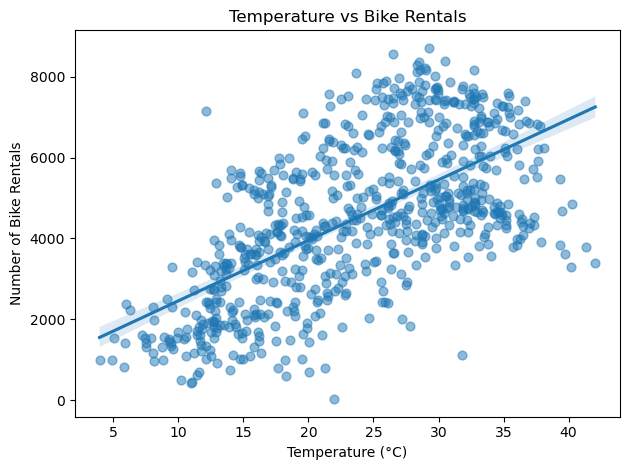

In [30]:
# Create a scatter plot with a linear regression line to show relationship between 'temp' and 'cnt'
sns.regplot(data=df, x="atemp", y="cnt", scatter_kws={'s': 40, 'alpha': 0.5})

# Set title and label names for the plot
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bike Rentals")

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: What is the relationship between temperature and bike rentals?**

The scatterplot with a regression line above illustrates the relationship between temperature and bike rentals. The regression line helps to see the trend or general pattern in the data. Adding alpha in the plot to makes it easier to see density of points in crowded areas and improve the visual clarity of the plot. The title and axis labels are defined to convey the subject of the graph.

There is a positive correlation between temperature and the number of bike rentals. As temperature increases, the number of bike rentals also increases. The regression line indicates this upward trend. Warmer temperatures seem to encourage more people to rent bikes. While there is generally a positive relationship, there is likely an optimal temperature range for bike rentals, beyond which, the number of rentals starts to decline due to the extremes of the weather.

[Back to top](#top)

### 3.8 Humidity vs Bike Rentals <a id="part3.8"></a>

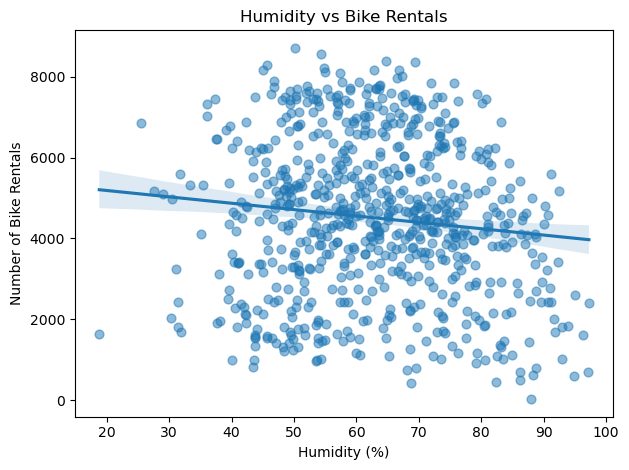

In [31]:
# Create a scatter plot with a linear regression line to show relationship between 'hum' and 'cnt'
sns.regplot(data=df, x="hum", y="cnt", scatter_kws={'s': 40, 'alpha': 0.5})

# Set title and label names for the plot
plt.title("Humidity vs Bike Rentals")
plt.xlabel("Humidity (%)")
plt.ylabel("Number of Bike Rentals")

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: What is the relationship between humidity and bike rentals?**

The scatterplot with a regression line above illustrates the relationship between humidity and bike rentals. The regression line helps to see the trend or general pattern in the data. Adding alpha in the plot to makes it easier to see density of points in crowded areas and improve the visual clarity of the plot. The title and axis labels are defined to convey the subject of the graph.

There is a slight negative correlation between humidity and bike rentals. As humidity increases, the number of bike rentals decreases. This is supported by the regression line, which slopes downward. Higher humidity might make biking less comfortable, reducing rentals.

[Back to top](#top)

### 3.9 Wind Speed vs Bike Rentals <a id="part3.9"></a>

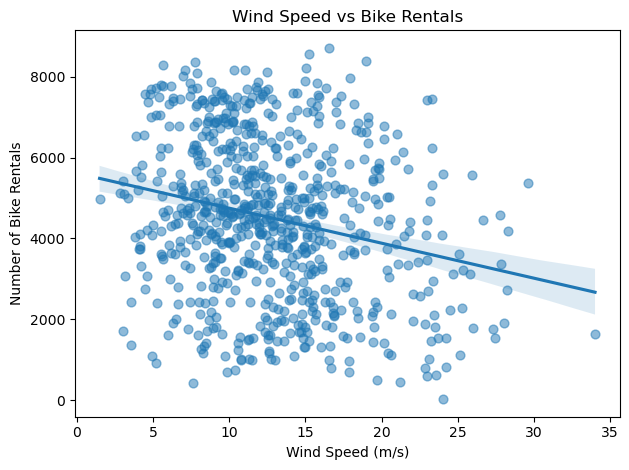

In [32]:
# Create a scatter plot with a linear regression line to show relationship between 'windspeed' and 'cnt'
sns.regplot(data=df, x="windspeed", y="cnt", scatter_kws={'s': 40, 'alpha': 0.5})

# Set title and label names for the plot
plt.title("Wind Speed vs Bike Rentals")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Number of Bike Rentals")

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: What is the relationship between wind speed and bike rentals?**

The scatterplot with a regression line above illustrates the relationship between humidity and bike rentals. The regression line helps to see the trend or general pattern in the data. Adding alpha in the plot to makes it easier to see density of points in crowded areas and improve the visual clarity of the plot. The title and axis labels are defined to convey the subject of the graph.

There is a slight negative correlation between wind speed and bike rentals. As the wind speed increases, the number of bike rentals decreases. This is supported by the regression line, which slopes downward. Windier conditions might discourage people from renting bikes because it makes riding less comfortable or more difficult.

[Back to top](#top)

### 3.10 Correlation Heatmap of Weather Variables and Bike Rentals <a id="part3.10"></a>

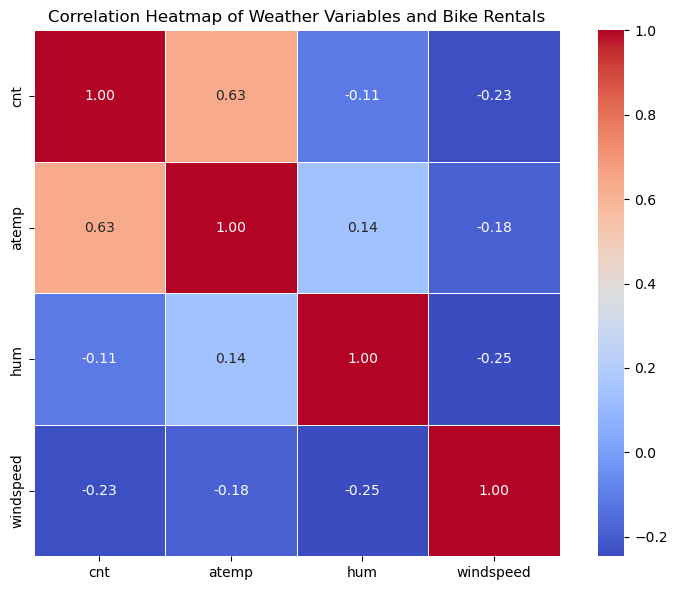

In [33]:
# Select weather-relevant columns for correlation analysis
selected_cols = ['cnt', 'atemp', 'hum', 'windspeed']
# Calculate the correlation matrix for the selected columns
corr = df[selected_cols].corr()

# Set figure size for the plot
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the calculated correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Set title and label names for the plot
plt.title('Correlation Heatmap of Weather Variables and Bike Rentals')

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Which weather variable has the strongest correlation with bike rentals?**

Based on this correlation heatmap of weather variables and bike rentals, apparent temperature (atemp) has the strongest correlation to bike rentals (cnt), with a corrrelation coefficient of 0.63. This means that among the weather variables shown (apparent temperature, humidity, and wind speed), apparent temperature has the most significant positive relationship with bike rentals. This is the weather variable worth exploring in more detail.

[Back to top](#top)

### 3.11 Bike Rentals by Temperature Range <a id="part3.11"></a>

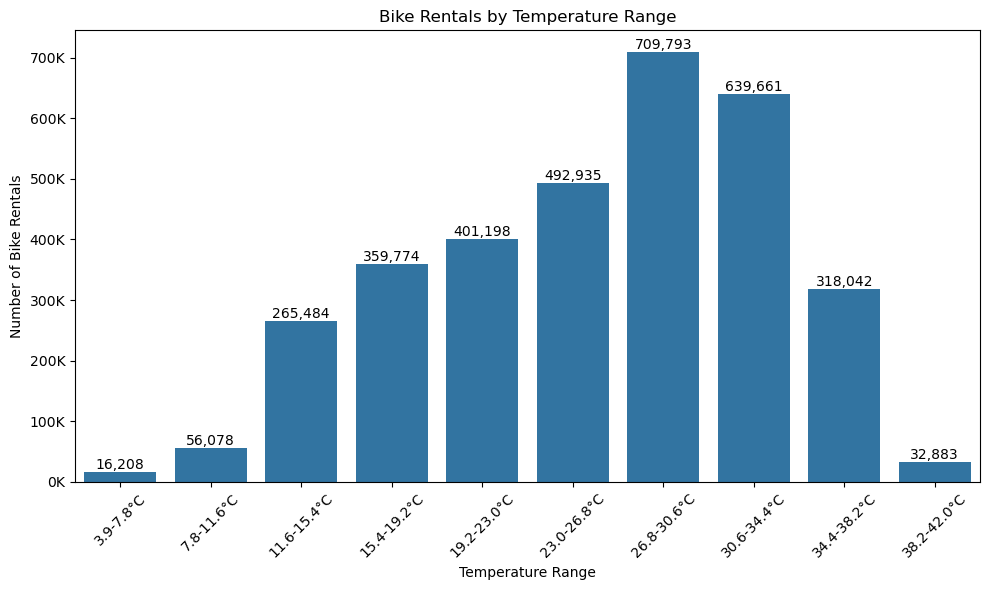

In [48]:
# Set figure size for the plot
plt.figure(figsize=(10,6))

# Create temperature bins by dividing 'atemp' column into 10 equal intervals
df['temp_bin'] = pd.cut(df['atemp'], bins=10)

# Group the data by these temperature bins and sum the 'cnt' within each bin
temp_grouped = df.groupby('temp_bin', observed=True)['cnt'].sum().reset_index()

# Simplify the temperature bin labels for clearer x-axis ticks
temp_grouped['temp_bin'] = temp_grouped['temp_bin'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}°C")

# Create a bar plot showing 'cnt' for each temperature range (bin)
barplot = sns.barplot(data=temp_grouped, x='temp_bin', y='cnt')

# Format y-axis in K
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and label names for the plot
plt.title("Bike Rentals by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Number of Bike Rentals")

# Annotation of values on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Which temperature range do riders prefer for biking?**

This bar chart illustrates the number of bike rentals according to different temperature ranges. Each bar represents a specific temperature range from the dataset itself. These 10 bins cover a temperature range from about 3.9°C to 42.0°C, representing different temperature conditions that correlate with the number of bike rentals. The y-axis labels were formatted using shorter numerical representations. The title and axis labels are defined to convey the subject of the graph. Each bar is annotated with values to clearly indicate the number of bike rentals.

The temperature range of 26.8–30.6°C corresponds to the highest number of bike rentals (709,793 rentals). The lower temperature ranges (like 3.9–7.8°C or 7.8–11.6°C) have significantly fewer bike rentals, with just 16,208 and 56,078 rentals, respectively. It seems that bike rentals increase as temperatures rise, peaking around the 26.8–30.6°C range, and then start to decline as temperatures move higher beyond 30.6°C. This suggests that people tend to rent bikes the most when the temperature is in this moderate and comfortable range, which is ideal for biking. The management can leverage this temperature-related insight to make smarter decisions in operations, marketing, and service planning. Ensuring and improving comfort in extreme weather to make it more attractive during non-ideal temperature. During hot weather, offer bikes with shade covers or fans and increase water refill stations for hydration. During cold weather, promote bikes with heated grips or introduce portable warming stations.


[Back to top](#top)

## Customer

### 3.12 Proportion of Bike Rentals by User Type <a id="part3.12"></a>

In [35]:
# Choose 2 distinct colors for customer analysis
user_colors = ['#ff7f0e', '#1f77b4']

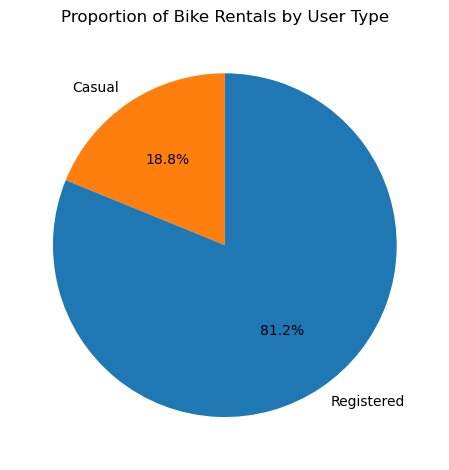

In [36]:
# Calculate total number of 'cnt' by user type
sizes = [df['casual'].sum(), df['registered'].sum()]

# Create a pie chart showing the proportion of 'cnt' by user type
plt.pie(sizes, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=user_colors)

# Set the title of the plot
plt.title('Proportion of Bike Rentals by User Type')

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Are there more casual or registered customers?**

The pie chart above illustrates the proportion of bike rentals by user type, categorized into two groups: Casual and Registered users.

It indicates that 81.2% of the rentals are by registered users, while 18.8% are by casual users. This suggests that a larger portion of bike rentals comes from individuals who are signed up or have an account with the service, compared to those renting bikes casually without registration. The management should focus on encouraging casual users to register through incentives, improving the overall user experience, and leveraging data from registered users to refine services and marketing strategies. By doing so, they could increase registration rates, drive more loyalty, and maximize the value of their user base.

[Back to top](#top)

### 3.13 Bike Rentals by Day of the Week and User Type <a id="part3.13"></a>

In [38]:
# Reshape the dataframe from wide to long format
df_melt = df.melt(
    id_vars=['weekday', 'weathersit', 'day_type', 'month_year'], # Columns to keep
    value_vars=['casual', 'registered'], # Columns to unpivot
    var_name='user_type', # Name for new column representing user type
    value_name='rentals', # Name for new column representing rental counts
)

# Define a dictionary to map numeric weekday codes to weekday names
day_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Replace the numeric 'weeekday' values in df_melt with their corresponding day names
df_melt['weekday'] = df_melt['weekday'].map(day_map)

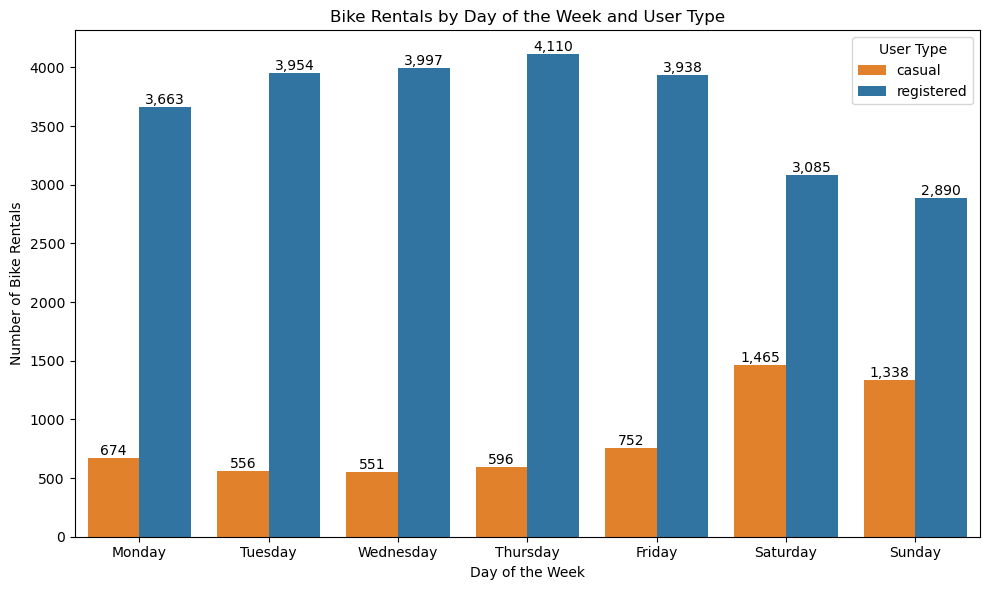

In [39]:
# Set the figure size for the plot
plt.figure(figsize=(10,6))

# Create a bar plot to show 'cnt' by 'weekday' and separate bar by 'user_type'
barplot = sns.barplot( data=df_melt, x='weekday', y='rentals', palette=user_colors, hue='user_type', order=day_order, errorbar=None)

# Set title and label names for the plot
plt.title('Bike Rentals by Day of the Week and User Type')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Day of the Week')

# Customize the legend title and labels
plt.legend(title='User Type')

# Annotation of values on top of each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: What are the usage patterns? Which day of the week do they prefer?**

The grouped bar chart above illustrates the number of bike rentals by user type across different days of the week. It allows an easy comparison of the number of bike rentals by user type (Casual vs. Registered) across multiple days of the week, and highlights differences or similarities clearly. The title and axis labels are defined to convey the subject of the graph. Each bar is annotated with values to clearly indicate the number of bike rentals.

Registered Users dominate the bike rentals on weekdays (Monday to Friday). These numbers are consistently higher compared to casual rentals.
Casual Users have a small number of rentals during weekdays, with a noticeable spike towards the weekend.
Saturday and Sunday see a notable rise in rentals, but the increase in rentals from casual users is far more significant than during the week. This suggests that more casual users rent bikes during the weekend, potentially because of leisure or tourist activities and more registered users rent bikes during the weekday, likely due to commuting or routine activities.

Since casual rentals are low during the week, management could create weekday-specific discounts to encourage more usage. This could include midweek ride discounts, bundled offers with local businesses, or special passes for tourists and locals. Since registered users predominantly rent bikes on weekdays, improving commuter-focused infrastructure and services is essential. This includes ensuring high bike availability near workplaces and transit hubs, maintaining secure parking facilities, and enhancing bike lanes. Loyalty programs and perks for consistent commuters can further solidify user retention. In addition, encourage registered users to use the bikes for weekend leisure or social activities by organize group riders, weekend challenges or special events.

[Back to top](#top)

### 3.14 Distribution of Bike Rentals across Weather Type by User Type <a id="part3.14"></a>

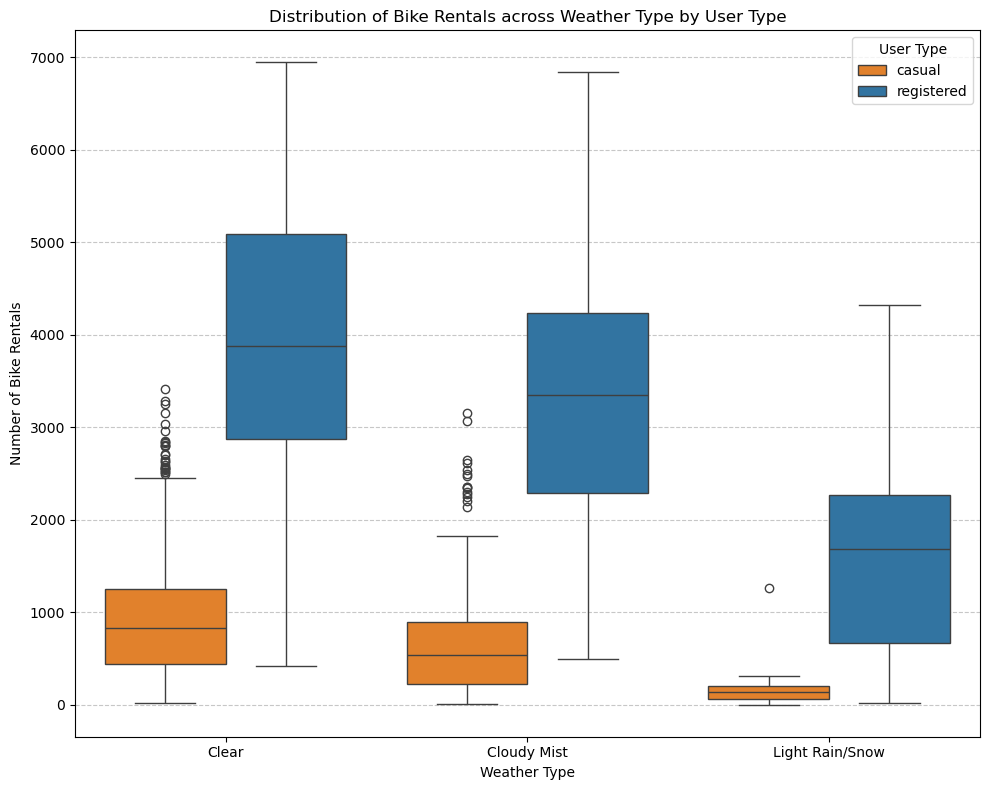

In [40]:
# Set figure size for the plot
plt.figure(figsize=(10,8))

# Create a boxplot to compare 'cnt' distributions by 'weathersit' and 'user_type'
sns.boxplot(data=df_melt, x='weathersit', y='rentals', palette=user_colors, hue='user_type')

# Set title and label names for the plot
plt.title('Distribution of Bike Rentals across Weather Type by User Type')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Weather Type')

# Define readable labels for the weather type
weathertype_labels = ['Clear', 'Cloudy Mist', 'Light Rain/Snow']
# Replace the x-axis tick labels with the weather type
plt.xticks(ticks=[0, 1, 2], labels=weathertype_labels)

# Customize the legend title and labels
plt.legend(title='User Type')

# Set grid
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Display the plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Are casual users more affected by weather type?**

The grouped box plot above illustrates the distribution of bike rentals across weather type by user type. Unlike simple bar charts, box plots display deeper insights into how bike rentals vary under different weather conditions. The plot identifies outliers, which can be important for understanding unusual spikes or drops in rentals, helping management investigate specific events or anomalies.

- Clear: Both casual and registered users have relatively high bike rental numbers. The median for registered users is much higher than that for casual users. The spread of registered users is wider, showing more variability and generally higher usage. Casual users also have a number of outliers, meaning occasional days with much higher rentals.
- Cloudy Mist: Rentals drop for both groups, but the decrease is more noticeable for casual users. Casual users’ median rentals are lower, and the IQR is smaller, indicating less frequent or consistent usage in this weather. Registered users still maintain relatively high median rentals and wider variability compared to casual users.
- Light Rain/Snow: The effect of bad weather is most dramatic here. Casual users have a very low median rental count, with a very compressed IQR, showing consistently low usage. Registered users experience a drop as well, but their median rentals remain significantly higher than casual users, and their IQR is larger, indicating some variability and resilience to weather changes. Outliers in casual users are almost absent, confirming minimal usage during adverse weather.

Casual riders are highly sensitive to weather changes, with significantly fewer rentals as conditions worsen. The management can offer special discounts or incentives on days with cloudy or mild rain to encourage casual riders to still rent bikes despite less favorable weather. Introduce "weather-proof" packages that include accessories like rain ponchos, waterproof bike covers, or bike maintenance services to reassure casual riders. Provide portable shelters or covered bike stations at popular rental points to protect users from rain or snow while they pick up or return bikes. Equip bikes with weather-resistant gear such as fenders and lights, improving safety and comfort during poor weather. By implementing these measures, management can reduce the negative impact of weather on casual users, encouraging more consistent rentals and improving overall customer satisfaction.

[Back to top](#top)

### 3.15 Bike Rentals over Time by User Type <a id="part3.15"></a>

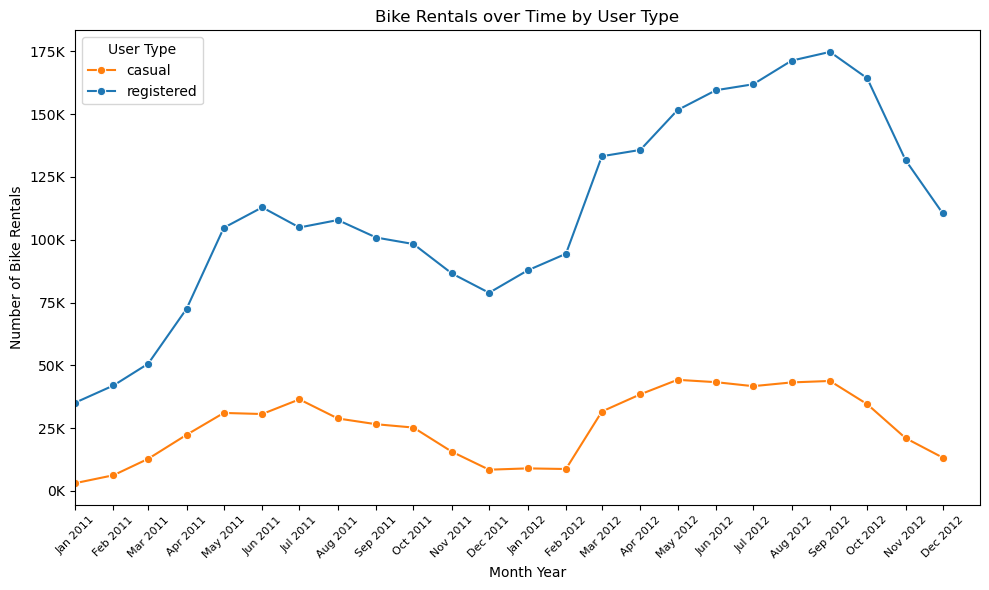

In [55]:
# Set figure size of the plot
plt.figure(figsize=(10,6))

# Group the data by 'month_year', 'user_type' and calculate total 'cnt' for each month
monthlyuser_df = df_melt.groupby(['month_year', 'user_type'])['rentals'].sum().reset_index()

# Create a line plot of 'cnt' over 'month_year' by 'user_type'
sns.lineplot(x='month_year', y='rentals', data=monthlyuser_df, palette=user_colors, hue='user_type', marker="o", errorbar=None)

# Format y-axis in K
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Format the x-axis dates to month and full year (e.g.,'Jan 2011')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Set x-axis ticks to be monthly intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

# Set the x-axis limit range, rotate the labels and set font size for better readability
plt.xlim(pd.to_datetime('2011-01-01'), pd.to_datetime('2012-12-31'))
plt.xticks(rotation=45, fontsize=8) 

# Set title and label names for the plot
plt.title('Bike Rentals over Time by User Type')
plt.ylabel('Number of Bike Rentals')
plt.xlabel('Month Year')

# Customize the legend title and labels
plt.legend(title='User Type')

# Display plot with adjusted tight layout
plt.tight_layout()
plt.show()

**Question: Are there noticeable trends in bike rentals over time by the different users?**

The line chart above illustrates the number of bike rentals over time by user type. It helps to identify growth patterns, seasonal trends or period of low/high demand across the 2 user types. Monthly bike rentals was used instead of daily figures to reduce variability and highlight broader usage trends, enabling clearer insights into seasonal p[atterns and long-term changes in bike rental behaviours. Month-year labels such as 'Jan 2011' were used on the time axis to improve readibility. The use of markers clearly indicate which each data value lies along the line. To enhance readability, the y-axis labels were formatted using shorter numerical representations. The title and axis labels are defined to convey the subject of the graph.

Casual users are highly seasonal (Strong usage in summer, very low in winter). Registered users are more consistent and less weather-dependent, though still influenced by season. Registered users for commuting while casual users for recreation and tourism Overall, there is growth on usage over time especially among registered users. The number of rentals by registered users is consistently higher than casual users. Registered users consistently rent more bikes than casual users across the timeline. Both user types follow similar seasonal trends, indicating that weather or seasonal factors strongly influence bike rental activity. Both user types show similar seasonal patterns (peaking in warmer months and dropping in winter), but the magnitude of rentals is consistently larger for registered users.

The management can maximize bike rental usage throughout the year by tailoring strategies to the distinct behaviors of casual and registered users. Promote short term rentals and tourism based packages in peak seasons for casual users. They are less likely to commit to long-term memberships. Offering short-term rental options like hourly or daily passes makes it easy and convenient for tourists or occasional riders to use the bikes without a long-term commitment. Registered users are generally consistent year-round, using bikes primarily for commuting and regular travel rather than occasional leisure. Promote long-term memberships and subscription plans that emphasize convenience, cost savings, and reliability. Monthly or annual passes with perks like priority access or discounted rates for frequent rides can boost loyalty.

[Back to top](#top)

---

# 4. Dashboard <a id="part4"></a>

### 4.1 Time Series Dashboard <a id="part4.1"></a>

In [43]:
# Function for annotation of values on top of each bar (Bar Plot)
def annotate_bars(ax, barplot, fontsize=10, color='white', va='top', padding=0):
    for bar in barplot.patches:
        height = bar.get_height()
        if height > 0:
            effective_padding = padding * height
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height - effective_padding,
                f'{int(height):,}',
                ha='center',
                va=va,
                fontsize=fontsize,
                color=color
            )

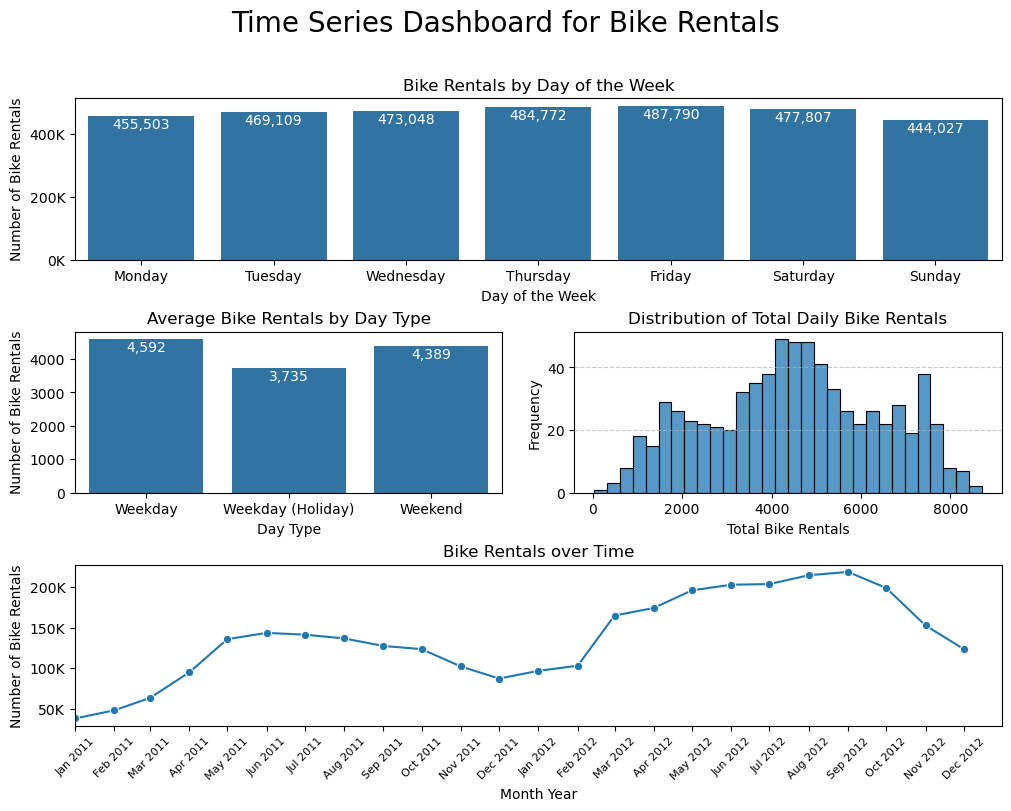

In [44]:
# A figure to be used as a dashboard
fig = plt.figure(figsize=(10,8), constrained_layout=True)

# GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=6, ncols=4, figure=fig)

# Define first subplot
ax1 = fig.add_subplot(gs[0:2, :])
day_barplot = sns.barplot(x='day', y='cnt', data=top_days, legend=True, order=day_order, ax=ax1)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax1.set_title('Bike Rentals by Day of the Week')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Bike Rentals')
annotate_bars(ax1, day_barplot, color='white', va='top', padding=0.01)

# Define second subplot
ax2 = fig.add_subplot(gs[2:4, 2:4])
sns.histplot(df['cnt'], bins=30, kde=False, ax=ax2)
ax2.set_title('Distribution of Total Daily Bike Rentals')
ax2.set_xlabel('Total Bike Rentals')
ax2.set_ylabel('Frequency')
ax2.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Define third subplot
ax3 = fig.add_subplot(gs[2:4, 0:2])
daytype_barplot = sns.barplot(data=avg_daytype, x='day_type', y='cnt', errorbar=None, ax=ax3)
ax3.set_title('Average Bike Rentals by Day Type')
ax3.set_ylabel('Number of Bike Rentals')
ax3.set_xlabel('Day Type')
annotate_bars(ax3, daytype_barplot, color='white', va='top', padding=0.01)

# Define fourth subplot
ax4 = fig.add_subplot(gs[4:6, :])
sns.lineplot(x='month_year', y='cnt', data=monthly_df, marker="o", errorbar=None, ax=ax4)
ax4.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax4.set_xlim(pd.to_datetime('2011-01-01'), pd.to_datetime('2012-12-31'))
plt.setp(ax4.get_xticklabels(), rotation=45, ha='center', fontsize=8)
ax4.set_title('Bike Rentals over Time')
ax4.set_ylabel('Number of Bike Rentals')
ax4.set_xlabel('Month Year')

# Set title of dashboard
fig.suptitle("Time Series Dashboard for Bike Rentals\n", fontsize=20)

# Display the dashboard
plt.show()

[Back to top](#top)

### 4.2 Weather Impact Dashboard <a id="part4.2"></a>

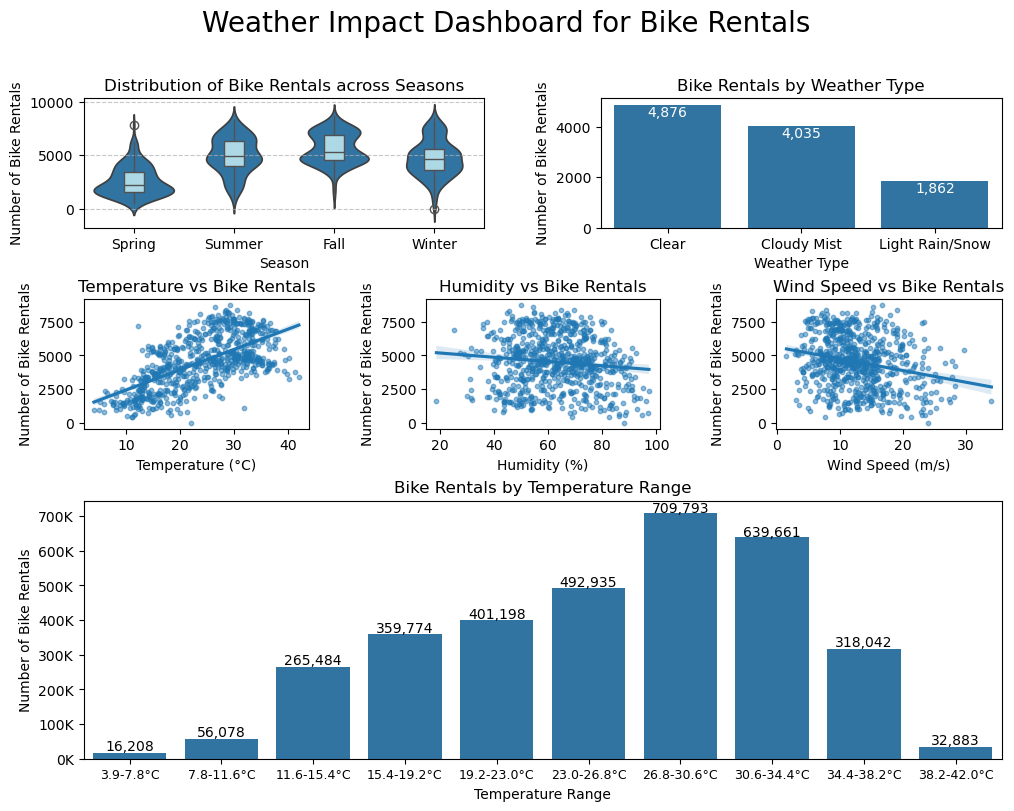

In [56]:
# A figure to be used as a dashboard
fig = plt.figure(figsize=(10,8), constrained_layout=True)

# GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=8, ncols=6, figure=fig)

# First subplot
ax1 = fig.add_subplot(gs[0:2, 0:3])
sns.violinplot(data=df, x='season', y='cnt', legend=True, inner=None, ax=ax1)
sns.boxplot(data=df, x='season', y='cnt', whis=1.5, width=0.2, showcaps=False, boxprops={'facecolor':'lightblue'}, showfliers=True, ax=ax1)
ax1.set_xticks(ticks=[0, 1, 2, 3], labels=season_labels)
ax1.set_title('Distribution of Bike Rentals across Seasons')
ax1.set_ylabel('Number of Bike Rentals')
ax1.set_xlabel('Season')
ax1.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Second subplot
ax2 = fig.add_subplot(gs[0:2, 3:6])
weather_barplot = sns.barplot(data=df, x='weathersit', y='cnt', errorbar=None, ax=ax2)
ax2.set_xticks(ticks=[0, 1, 2], labels=weathertype_labels)
ax2.set_title('Bike Rentals by Weather Type')
ax2.set_ylabel('Number of Bike Rentals')
ax2.set_xlabel('Weather Type')
annotate_bars(ax2, weather_barplot, color='white', va='top', padding=0.01)

# Third subplot
ax3 = fig.add_subplot(gs[2:4, 0:2])
sns.regplot(data=df, x="atemp", y="cnt", scatter_kws={'s': 10, 'alpha': 0.5}, ax=ax3)
ax3.set_title("Temperature vs Bike Rentals")
ax3.set_xlabel("Temperature (°C)")
ax3.set_ylabel("Number of Bike Rentals")

# Fourth subplot
ax4 = fig.add_subplot(gs[2:4, 2:4])
sns.regplot(data=df, x="hum", y="cnt", scatter_kws={'s': 10, 'alpha': 0.5}, ax=ax4)
ax4.set_title("Humidity vs Bike Rentals")
ax4.set_xlabel("Humidity (%)")
ax4.set_ylabel("Number of Bike Rentals")

# Fifth subplot
ax5 = fig.add_subplot(gs[2:4, 4:6])
sns.regplot(data=df, x="windspeed", y="cnt", scatter_kws={'s': 10, 'alpha': 0.5}, ax=ax5)
ax5.set_title("Wind Speed vs Bike Rentals")
ax5.set_xlabel("Wind Speed (m/s)")
ax5.set_ylabel("Number of Bike Rentals")

# Sixth subplot
ax6 = fig.add_subplot(gs[4:8, :])
temp_barplot = sns.barplot(data=temp_grouped, x='temp_bin', y='cnt', ax=ax6)
ax6.set_title("Bike Rentals by Temperature Range")
ax6.set_xlabel("Temperature Range")
ax6.set_ylabel("Number of Bike Rentals")
ax6.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.setp(ax6.get_xticklabels(), fontsize=9)
annotate_bars(ax6, temp_barplot, color='black', va='bottom', padding=0.01)

# Set title of dashboard
fig.suptitle("Weather Impact Dashboard for Bike Rentals\n", fontsize=20)

# Display the dashboard
plt.show()

[Back to top](#top)

### 4.3 Customer Behaviour Dashboard <a id="part4.3"></a>

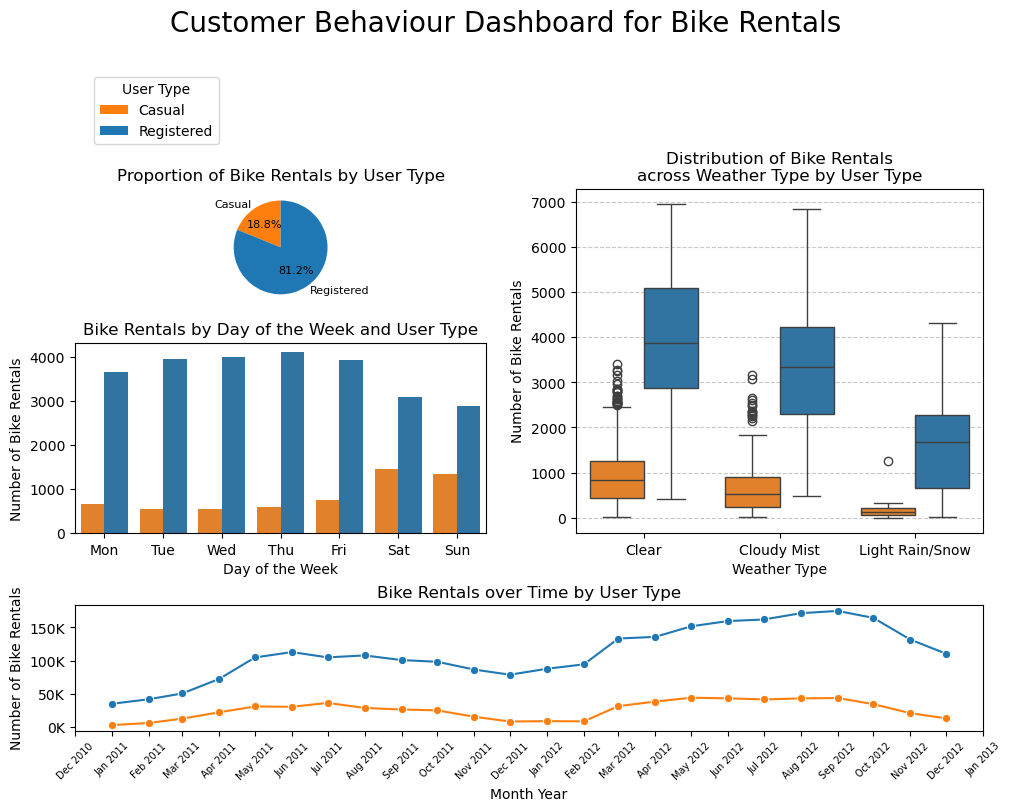

In [46]:
# A figure to be used as a dashboard
fig = plt.figure(figsize=(10,8), constrained_layout=True)

# GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=8, ncols=4, figure=fig)

# First subplot
ax1 = fig.add_subplot(gs[1:3, 0:2])
ax1.pie(sizes, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=user_colors, textprops={'fontsize': 8})
ax1.set_title('Proportion of Bike Rentals by User Type')
#ax1.legend(title='User Type', loc='lower left', bbox_to_anchor=(-1, 0.5), fontsize=8)

# Second subplot
ax2 = fig.add_subplot(gs[3:6, 0:2])
barplot1 = sns.barplot(data=df_melt, x='weekday', y='rentals', palette=user_colors, hue='user_type', errorbar=None, order=day_order, legend=False, ax=ax2)
ax2.set_title('Bike Rentals by Day of the Week and User Type')
ax2.set_ylabel('Number of Bike Rentals')
ax2.set_xlabel('Day of the Week')
shortday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticks(range(len(shortday_order)))
ax2.set_xticklabels(shortday_order)

# Third subplot
ax4 = fig.add_subplot(gs[1:6, 2:4])
sns.boxplot(data=df_melt, x='weathersit', y='rentals', palette=user_colors, hue='user_type', legend=False, ax=ax4)
ax4.set_title('Distribution of Bike Rentals\nacross Weather Type by User Type')
ax4.set_ylabel('Number of Bike Rentals')
ax4.set_xlabel('Weather Type')
plt.xticks(ticks=[0, 1, 2], labels=weathertype_labels)
ax4.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Fourth subplot
ax5 = fig.add_subplot(gs[6:8, 0:4])
sns.lineplot(data=monthlyuser_df, x='month_year', y='rentals', palette=user_colors, hue='user_type', marker="o", errorbar=None, legend=False, ax=ax5)
ax5.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax5.set_xlim(pd.to_datetime('2010-12-01'), pd.to_datetime('2013-01-01'))
plt.setp(ax5.get_xticklabels(), rotation=45, fontsize=7)
ax5.set_title('Bike Rentals over Time by User Type')
ax5.set_ylabel('Number of Bike Rentals')
ax5.set_xlabel('Month Year')

# Legend subplot
ax_leg = fig.add_subplot(gs[0, 0])
ax_leg.axis('off')
handles, labels = ax1.get_legend_handles_labels()
ax_leg.legend(handles, labels, title='User Type', loc='center', fontsize=10)

# Set title of dashboard
fig.suptitle("Customer Behaviour Dashboard for Bike Rentals\n", fontsize=20)

# Display the dashboard
plt.show()

[Back to top](#top)